In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow import keras
from tensorflow.keras import layers # type: ignore
from datetime import datetime
import cv2
import time

# Import Data

In [7]:
data_train_path='./dataset/newDatasetSplit/train'
data_test_path='./dataset/newDatasetSplit/test'
data_val_path='./dataset/newDatasetSplit/val'

In [8]:
img_width = 180
img_height = 180

In [9]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size = 32,
    validation_split=False
)

Found 3675 files belonging to 25 classes.


In [10]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size = 32,
    validation_split=False
)

Found 17125 files belonging to 25 classes.


In [11]:
data_cat = data_train.class_names
print(data_cat)

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '24', '25']


In [12]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size = 32,
    validation_split=False
)

Found 3700 files belonging to 25 classes.


2025-03-31 08:28:32.734926: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


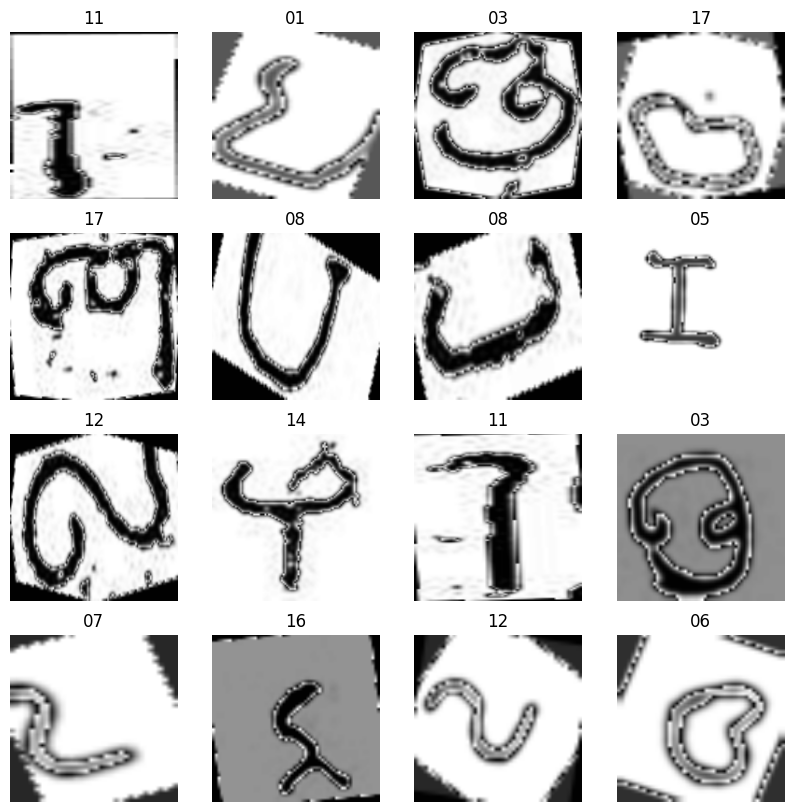

In [ ]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

# Building Model

In [18]:
from tensorflow.keras.models import Sequential # type: ignore

## Checking GPU

In [19]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

Physical devices cannot be modified after being initialized


## Pushing Model in GPU

In [20]:
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    # Print GPU details
    print(f"Using GPU: {tf.config.experimental.get_device_details(gpus[0])['device_name']}")
    with tf.device('/GPU:0'):
        # Define your model architecture
        model = Sequential([
        layers.Rescaling(1./255),
        layers.Conv2D(16, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32,3, padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(128),
        layers.Dense(len(data_cat))

    ])

        # Compile the model
        model.compile(optimizer='adam',
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])
else:
    print("No GPU detected, running on CPU.")
    model = Sequential([
        layers.Rescaling(1./255),
        layers.Conv2D(16, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32,3, padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(128),
        layers.Dense(len(data_cat))
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

Using GPU: NVIDIA GeForce RTX 3050 Laptop GPU


## Import Model module

In [ ]:
from tensorflow.keras.models import Model # type: ignore
from tensorflow.keras.models import load_model # type: ignore
epochs_size = 32

### Fitting Data , Training & Plotting

Epoch 1/32


I0000 00:00:1743350879.290769    3050 service.cc:152] XLA service 0x7f9ac0005bb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1743350879.291822    3050 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-03-30 16:07:59.850439: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1743350880.894653    3050 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1743350896.848190    3050 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6194 - loss: 1.6020

2025-03-30 16:08:39.179181: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng0{} for conv %cudnn-conv-bias-activation.10 = (f32[32,32,90,90]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,16,90,90]{3,2,1,0} %bitcast.528, f32[32,16,3,3]{3,2,1,0} %bitcast.535, f32[32]{0} %bitcast.537), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1_1/conv2d_4_1/convolution" source_file="/mnt/c/Users/Pavan Sarvesh/tf-env/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false} is taking a while...
2025-03-30 16:08:39.202330: E external/local_xla/xla/service/slow_operation_alarm.cc:140] The operation took 2.066989304s
Tryi

536/536 ━━━━━━━━━━━━━━━━━━━━ 48s 52ms/step - accuracy: 0.6197 - loss: 1.6004 - val_accuracy: 0.9224 - val_loss: 0.2569
Epoch 2/32
536/536 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - accuracy: 0.9571 - loss: 0.1494 - val_accuracy: 0.9747 - val_loss: 0.0750
Epoch 3/32
536/536 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.9812 - loss: 0.0602 - val_accuracy: 0.9771 - val_loss: 0.0763
Epoch 4/32
536/536 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.9894 - loss: 0.0332 - val_accuracy: 0.9755 - val_loss: 0.0976
Epoch 5/32
536/536 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.9881 - loss: 0.0392 - val_accuracy: 0.9801 - val_loss: 0.0694
Epoch 6/32
536/536 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - accuracy: 0.9935 - loss: 0.0200 - val_accuracy: 0.9788 - val_loss: 0.0768
Epoch 7/32
536/536 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - accuracy: 0.9938 - loss: 0.0198 - val_accuracy: 0.9725 - val_loss: 0.1217
Epoch 8/32
536/536 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.9922 - loss: 0.0294 - val_accurac

Text(0.5, 1.0, 'Loss')

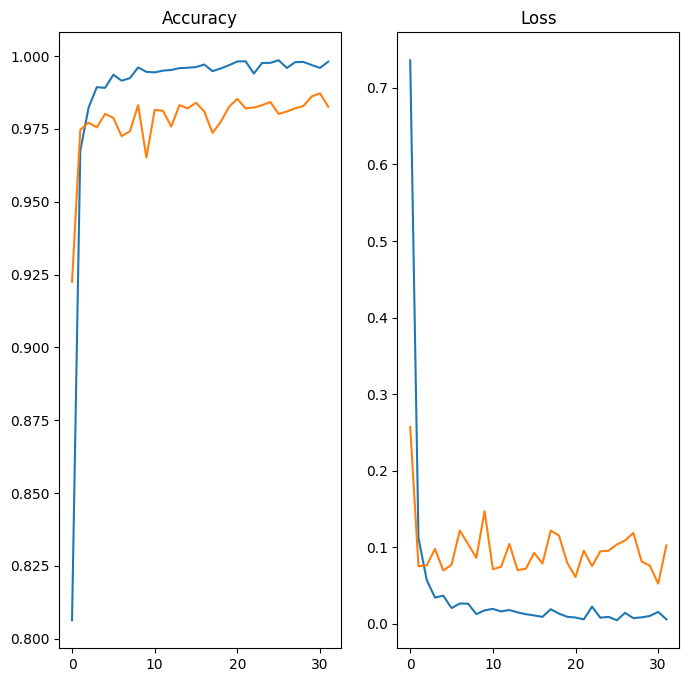

In [ ]:
history = model.fit(data_train,validation_data=data_val, epochs=epochs_size)

# Plotting in Graph
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

### Save MODEL

In [ ]:
# save model
model.save('cnnModel.h5')
print('Model Saved!')

Model Saved!


### load model

In [24]:
savedModel=load_model('cnnModel.h5')
savedModel.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,991,867 (15.23 MB)

 Trainable params: 3,991,865 (15.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Using Image File

In [27]:
image_path = 'dataset/newDatasetSplit/test/24/130_aug119.png'
image = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(image)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

# Normalize pixel values to be between 0 and 1
img_bat = img_array
predict = savedModel.predict(img_bat)
score = tf.nn.softmax(predict)
predicted_category = np.argmax(score)
accuracy = np.max(score) * 100
print("Predicted category: ", data_cat[predicted_category], " with accuracy: ", accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted category:  24  with accuracy:  100.0
